# **Tame Your Python**

Let's see how we can classify emails based on their contents

`Leggo`


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

In [0]:
def plot_dataset(X):
  plt.scatter(X[:,0], X[:,1])
  plt.show()

In [0]:
def evaluation_labels(y, y_pred):
  from sklearn import metrics
  adj_rand = metrics.adjusted_rand_score(y, y_pred)
  print("Adjusted Rand Score = " + str(adj_rand))

  adj_mi = metrics.adjusted_mutual_info_score(y, y_pred)
  print("Adjusted Mutual Information = " + str(adj_mi))

  h = metrics.homogeneity_score(y, y_pred)
  print("Homogeneity = " + str(h))

  v = metrics.v_measure_score(y, y_pred)
  print("V-measure = " + str(v))

  c = metrics.completeness_score(y, y_pred)
  print("Completeness = " + str(c))

  f = metrics.fowlkes_mallows_score(y, y_pred)
  print("Fowlkes-Mallows = " + str(f))

  return

def evaluation(X, y_pred):
  from sklearn import metrics
  try:   
    s = metrics.silhouette_score(X, y_pred, metric='euclidean')
    print("Silhouette Coefficient = " + str(s))

    c = metrics.calinski_harabasz_score(X, y_pred)
    print("Calinski-Harabasz  = " + str(c))

    d = metrics.davies_bouldin_score(X, y_pred)
    print("Davies-Bouldin  = " + str(d))
  except:
    print("Model did not converge")

  return

In [0]:
def visual(c, X, y):
  from sklearn.cluster import AffinityPropagation
  cluster_object = AffinityPropagation()
  y_pred = cluster_object.fit_predict(X)
  colors = ['red', 'green', 'blue', 'cyan', 'black', 'yellow', 'magenta', 'brown', 'orange', 'silver', 'goldenrod', 'olive', 'dodgerblue']
  clusters = np.unique(y_pred)
  print("Cluster Labels")
  print(clusters)
  print("Evaluation")
  evaluation_labels(y, y_pred)
  evaluation(X, y_pred)
  for cluster in clusters:
    row_idx = np.where(y == cluster)
    plt.scatter(X[row_idx, 0], X[row_idx, 1])
  plt.title('Dataset')
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.legend()
  plt.show()
  for cluster in clusters:
    row_idx = np.where(y_pred == cluster)
    plt.scatter(X[row_idx, 0], X[row_idx, 1])
  plt.title('Clusters')
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.legend()
  plt.show()

## Get the dataset

In [0]:
n = 1000
from sklearn.datasets import make_moons, make_blobs, make_circles, make_s_curve
X_moons, y_moons = make_moons(n_samples = n, noise=0.1)
X_blobs, y_blobs = make_blobs(n_samples = n, n_features = 2)
X_circles, y_circles = make_circles(n_samples=n, noise=0.1, factor = 0.4)
X_scurve, y_scurve = make_s_curve(n_samples=n, noise = 0.1)
X_random = np.random.random([n, 2])
y_random = np.random.randint(0,3,size = [n])
transformation = [[0.80834549, -0.83667341], [-0.20887718, 0.85253229]]
X_aniso = np.dot(X_blobs, transformation)
y_aniso = y_blobs

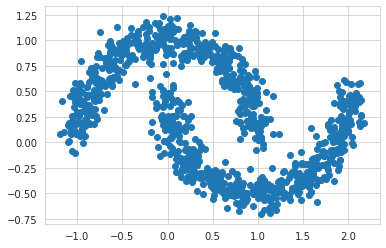

In [41]:
plot_dataset(X_moons)

Cluster Labels
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
Evaluation
Adjusted Rand Score = 0.11101696644313523
Adjusted Mutual Information = 0.38201823733411805
Homogeneity = 0.992638458145174
V-measure = 0.3849865285716717
Completeness = 0.23880193061262572
Fowlkes-Mallows = 0.3330440733702451
Silhouette Coefficient = 0.39907074414399424
Calinski-Harabasz  = 2795.741503520759
Davies-Bouldin  = 0.7718385275012322


No handles with labels found to put in legend.


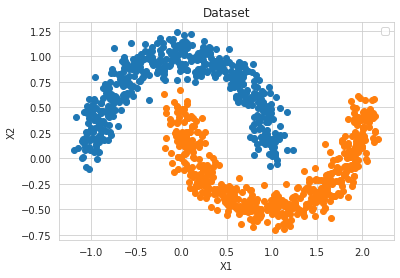

No handles with labels found to put in legend.


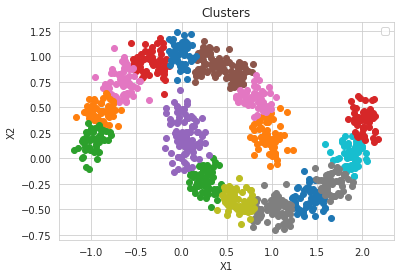

In [42]:
visual(2, X_moons, y_moons)

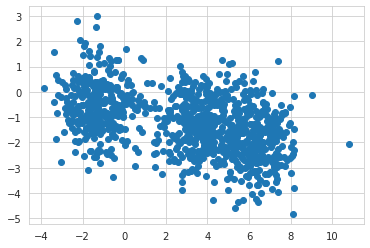

In [43]:
plot_dataset(X_blobs)

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_affinity_propagation.py:226: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)
No handles with labels found to put in legend.


Cluster Labels
[-1]
Evaluation
Adjusted Rand Score = 0.0
Adjusted Mutual Information = 6.063416801231523e-16
Homogeneity = 3.0317084006157617e-16
V-measure = 6.063416801231522e-16
Completeness = 1.0
Fowlkes-Mallows = 0.5767726299562651
Model did not converge


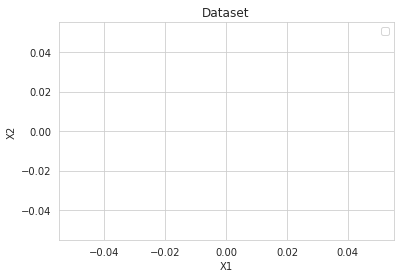

No handles with labels found to put in legend.


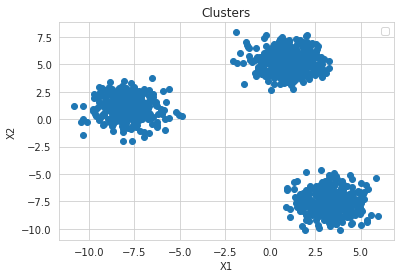

In [29]:
visual(3, X_blobs, y_blobs)

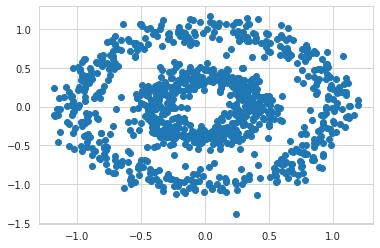

In [30]:
plot_dataset(X_circles)

No handles with labels found to put in legend.


Cluster Labels
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]
Evaluation
Adjusted Rand Score = 0.07905981327873615
Adjusted Mutual Information = 0.3383583942143733
Homogeneity = 0.9738194779045127
V-measure = 0.34279714855794785
Completeness = 0.20800962358256284
Fowlkes-Mallows = 0.2810513241276637
Silhouette Coefficient = 0.36899738470698573
Calinski-Harabasz  = 1241.9783585506073
Davies-Bouldin  = 0.7954179618660808


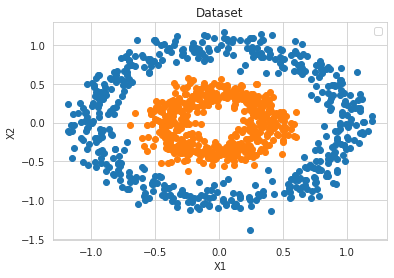

No handles with labels found to put in legend.


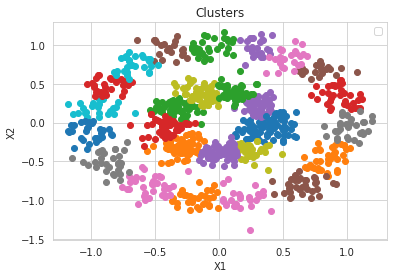

In [31]:
visual(2, X_circles, y_circles)

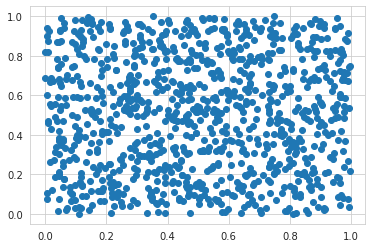

In [32]:
plot_dataset(X_random)

No handles with labels found to put in legend.


Cluster Labels
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]
Evaluation
Adjusted Rand Score = 0.00035456589934052793
Adjusted Mutual Information = 0.0003461405182986463
Homogeneity = 0.024853370692857195
V-measure = 0.012470505662024537
Completeness = 0.00832345412800384
Fowlkes-Mallows = 0.11210739087951606
Silhouette Coefficient = 0.327737143549774
Calinski-Harabasz  = 983.483917270417
Davies-Bouldin  = 0.8581514311828561


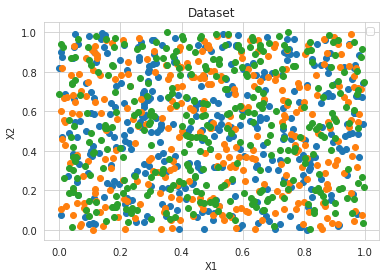

No handles with labels found to put in legend.


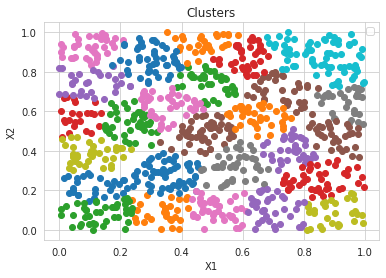

In [33]:
visual(3, X_random, y_random)

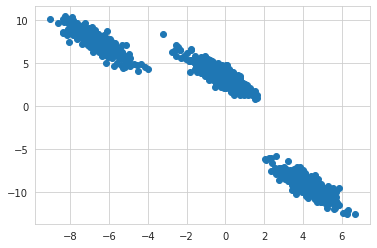

In [34]:
plot_dataset(X_aniso)

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_affinity_propagation.py:226: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)
No handles with labels found to put in legend.


Cluster Labels
[-1]
Evaluation
Adjusted Rand Score = 0.0
Adjusted Mutual Information = 6.063416801231523e-16
Homogeneity = 3.0317084006157617e-16
V-measure = 6.063416801231522e-16
Completeness = 1.0
Fowlkes-Mallows = 0.5767726299562651
Model did not converge


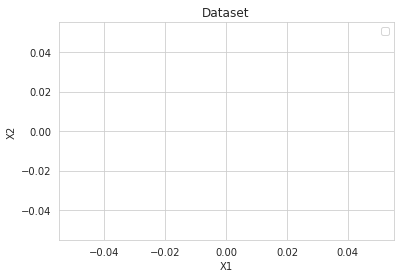

No handles with labels found to put in legend.


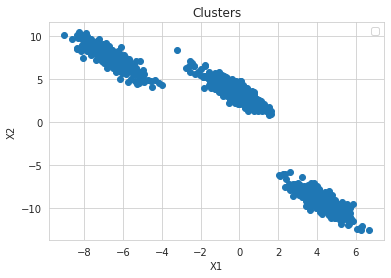

In [35]:
visual(3, X_aniso, y_aniso)